In [1]:
import numpy as np
import matplotlib.pyplot as plt
from openfermion.chem import MolecularData
from openfermion.transforms import get_fermion_operator, jordan_wigner, bravyi_kitaev
from openfermion.linalg import get_sparse_operator
from openfermion.ops import FermionOperator
from openfermionpyscf import run_pyscf
from pyscf import fci

In [11]:
basis = "sto-3g"  #basis set
multiplicity = 1  #spin multiplicity
charge = 0        #total charge for the molecule
description = "tmp"

r_list = []
energy_list = []
energy_hf_list = []

number = 101
for i in range(number):
    r = 0.1 + i*(4.0-0.1)/(number-1)
    geo = [("H",(0,0,0)),("H", (0,0,r))]
    mol = MolecularData(geo, basis, multiplicity, charge, description)
    mol = run_pyscf(mol,run_scf=1,run_fci=1)  

    r_list.append(r)
    energy_list.append(mol.fci_energy)
    energy_hf_list.append(mol.hf_energy)

In [12]:
r_min = 0
E_min = 0
index = 0

for j in range(len(energy_list)):
    if energy_list[j] < E_min:
        r_min = r_list[j]
        E_min = energy_list[j]
        index = j

print(r_min)
print(E_min)
print(index)

0.724
-1.1372031199371588
16


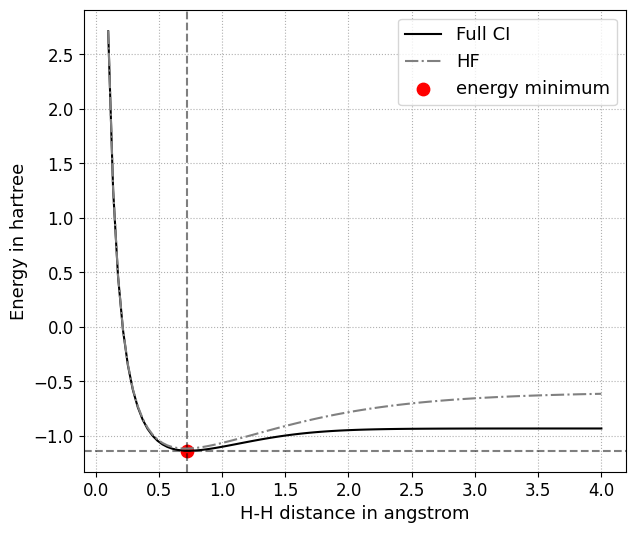

In [13]:
plt.figure(figsize=(7.0, 6.0))

#xmin_plot, xmax_plot = 0.2, 2.5
#ymin_plot, ymax_plot = -1.2, -0.5
#plt.xlim(xmin_plot, xmax_plot)
#plt.ylim(ymin_plot, ymax_plot)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel("H-H distance in angstrom", fontsize=13)
plt.ylabel("Energy in hartree", fontsize=13)

plt.axvline(r_min, color="black", linestyle="dashed", alpha=0.5)
plt.axhline(E_min, color="black", linestyle="dashed", alpha=0.5)

plt.plot(r_list, energy_list, color="black", linestyle="solid", label="Full CI")
plt.plot(r_list, energy_hf_list, color="gray", linestyle="dashdot", label="HF")
plt.scatter(r_min, E_min, c ="red", s=80, alpha=1.0, label="energy minimum")

plt.grid(linestyle='dotted')
plt.legend(loc='best', fontsize=13)
plt.show()

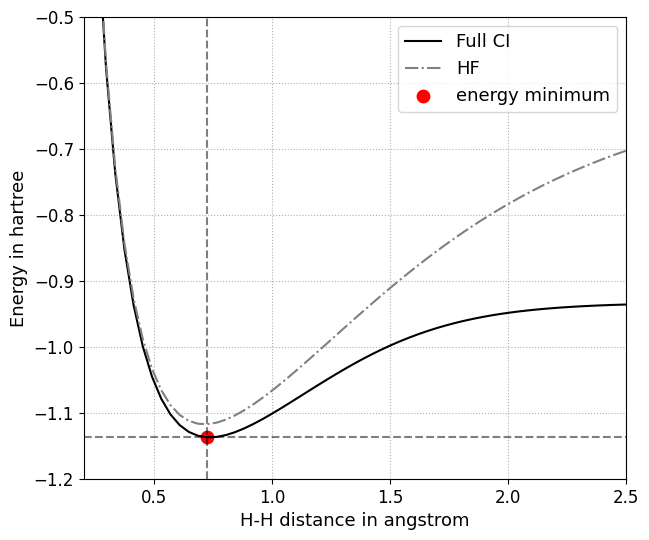

In [14]:
plt.figure(figsize=(7.0, 6.0))

xmin_plot, xmax_plot = 0.2, 2.5
ymin_plot, ymax_plot = -1.2, -0.5
plt.xlim(xmin_plot, xmax_plot)
plt.ylim(ymin_plot, ymax_plot)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel("H-H distance in angstrom", fontsize=13)
plt.ylabel("Energy in hartree", fontsize=13)

plt.axvline(r_min, color="black", linestyle="dashed", alpha=0.5)
plt.axhline(E_min, color="black", linestyle="dashed", alpha=0.5)

plt.plot(r_list, energy_list, color="black", linestyle="solid", label="Full CI")
plt.plot(r_list, energy_hf_list, color="gray", linestyle="dashdot", label="HF")
plt.scatter(r_min, E_min, c ="red", s=80, alpha=1.0, label="energy minimum")

plt.grid(linestyle='dotted')
plt.legend(loc='best', fontsize=13)
plt.show()